In [22]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [15]:
df= datasets.load_iris()

In [16]:
data_set= pd.DataFrame(df.data,columns=df.feature_names)

In [17]:
data_set['target']= df.target

In [18]:
data_set

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


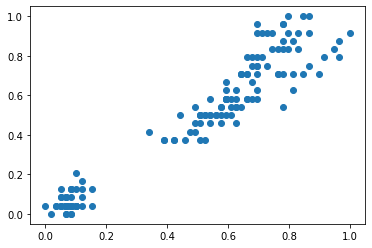

In [78]:
plt.scatter(data_set['petal length (cm)'],data_set['petal width (cm)'])

In [77]:
# there are 2 groups so   n_clusters=2
km= KMeans(n_clusters=3)

In [79]:
y_predicted=km.fit_predict(data_set[['petal length (cm)','petal width (cm)']])

In [80]:
data_set['cluster']= y_predicted

In [81]:
data_set

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,0.067797,0.041667,0,0
1,4.9,3.0,0.067797,0.041667,0,0
2,4.7,3.2,0.050847,0.041667,0,0
3,4.6,3.1,0.084746,0.041667,0,0
4,5.0,3.6,0.067797,0.041667,0,0
...,...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,2,1
146,6.3,2.5,0.677966,0.750000,2,1
147,6.5,3.0,0.711864,0.791667,2,1
148,6.2,3.4,0.745763,0.916667,2,1


<function matplotlib.pyplot.legend(*args, **kwargs)>

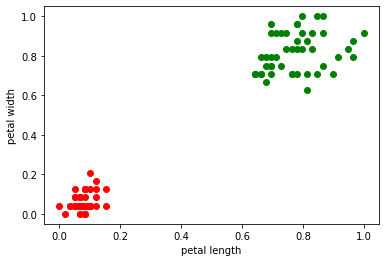

In [82]:
df1= data_set[data_set['cluster']==0]
df2= data_set[data_set['cluster']==1]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend

In [83]:
from sklearn.preprocessing import MinMaxScaler
# change the petal lenght and width into 0-1 scale
scaler = MinMaxScaler()

scaler.fit(data_set[['petal width (cm)']])
data_set['petal width (cm)'] = scaler.transform(data_set[['petal width (cm)']])

scaler.fit(data_set[['petal length (cm)']])
data_set['petal length (cm)'] = scaler.transform(data_set[['petal length (cm)']])




In [62]:
data_set

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,0.067797,0.041667,0,0
1,4.9,3.0,0.067797,0.041667,0,0
2,4.7,3.2,0.050847,0.041667,0,0
3,4.6,3.1,0.084746,0.041667,0,0
4,5.0,3.6,0.067797,0.041667,0,0
...,...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,2,1
146,6.3,2.5,0.677966,0.750000,2,1
147,6.5,3.0,0.711864,0.791667,2,1
148,6.2,3.4,0.745763,0.916667,2,1


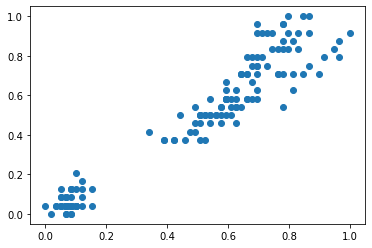

In [84]:
plt.scatter(data_set['petal length (cm)'],data_set['petal width (cm)'])


In [85]:
# k values central points
km.cluster_centers_


array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

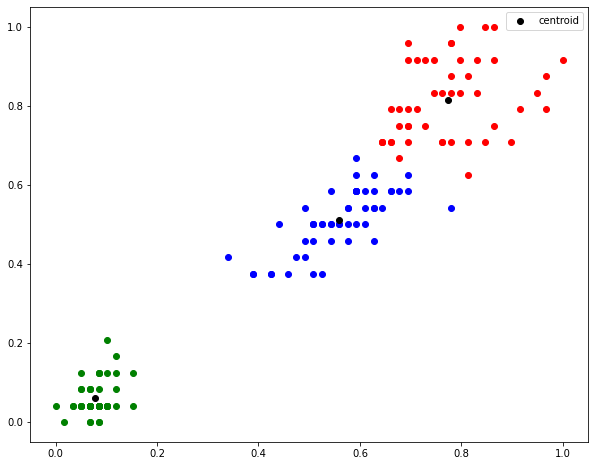

In [92]:
df1 = data_set[data_set.cluster==0]
df2 = data_set[data_set.cluster==1]
df3 = data_set[data_set.cluster==2]


fig, ax = plt.subplots(figsize = ( 10 , 8 ))

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',label='centroid')
plt.legend()

In [95]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data_set[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\ST\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


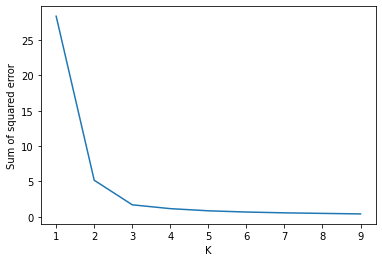

In [96]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)